In [4]:
for index in range(5):
    print(index)
    
    if index:
        print("nonzero")

0
1
nonzero
2
nonzero
3
nonzero
4
nonzero


In [5]:
index

4

In [6]:
type(index)

int

In [7]:
float(index)

4.0

In [8]:
bool(index)

True

In [9]:
bool(0)

False

In [20]:
test = len([0])

if test:
    print("True")
else:
    print("False")
    
bool(test)

False


False

In [21]:
import numpy as np

In [22]:
my_array = np.array([0])
my_list = [0]

print(my_array, my_list)

[0] [0]


In [25]:
my_list.append(1)
my_list

[0, 1, 1, 1]

In [28]:
3%2

1

In [34]:
for i in range(20):
    if i%2: # is it odd?
        continue
    if i>100:
        break
    print(i)
else:
    # I didn't break
    print("didn't break")

0
2
4
6
8
10
12
14
16
18
didn't break


In [35]:
for i in range(10):
    for j in range(10):
        if i>5:
            break # breaks from inner loop
i, j

(9, 0)

In [37]:
# it's possible to break from an inner loop:

for i in range(10):
    for j in range(10):
        if i>5:
            break # breaks from inner loop
    else:
        # didn't break from inner loop
        continue
    # did break from inner loop
    break # break from outer loop
i, j

# but a pain

(6, 0)

In [46]:
try:
    for i in range(10):
        for j in range(3):
            print(i,j)
            if i>3:
                raise ValueError("Stop!")
except ValueError:
    print("Carry on now")

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
3 0
3 1
3 2
4 0
Carry on now


In [55]:
i = 0
try:
    print(5/i)
except ZeroDivisionError:
    print("Oops")
        

Oops


In [49]:
print(5/i)

ZeroDivisionError: division by zero

In [56]:
import random


In [61]:
random.expovariate??

# Profiling

In [63]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [67]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from statistics import stdev

In [70]:
def run_everything():
    # put your code here
    import random
    random.seed(1)
    k1= 0.015
    k2= 0.00004
    k3= 0.0004
    k4= 0.04
    end_time= 600
    iterations=10

    #fn to calculate rates. r and f will be the current rabbit and fox populations
    def rates(r, f):
        rabbit_birth= k1*r
        rabbit_death= k2*r*f
        fox_birth= k3*r*f
        fox_death= k4*f
        current_rates= (rabbit_birth, rabbit_death, fox_birth, fox_death)
        return current_rates

    #created variables to count how many times fox population=0, second peak location arrays
    extinct=0
    second_peak_foxes= []
    second_peak_t= []

    #loop to iterate through the chosen number of iterations
    for i in range(iterations):
        #created lists, filled with initial values. j is the index for the lists, looped in the while fn
        t= []
        foxes= []
        rabbits= []
        t.append(0)
        foxes.append(200)
        rabbits.append(400)
        r=400
        f=200
        j=0

        #loop kmc to determine the event (rabbit birth, fox death, etc) for each time in t
        while t[-1] < end_time:
            (rabbit_birth, rabbit_death, fox_birth, fox_death)= current_rates= rates(r, f)
            sum_rates= sum(current_rates)
            if sum_rates== 0:
                #no rabbits or foxes left
                extinct+=1
                break
            #get change in time
            delta_t= random.expovariate(sum_rates)
            t.append(t[j]+ delta_t)
            event= random.uniform(0, sum_rates)
            #assign ranges for each event
            rdmax= rabbit_birth+ rabbit_death
            fbmax= rdmax+ fox_birth
            if event<rabbit_birth:
                #rabbit born
                rabbits.append(rabbits[j]+ 1)
                r+=1
                foxes.append(foxes[j])
            else:
                if rabbit_birth< event< rdmax:
                    #rabbit dies
                    rabbits.append(rabbits[j]- 1)
                    r-=1
                    foxes.append(foxes[j])
                else:
                    if rdmax< event< fbmax:
                        #fox born
                        rabbits.append(rabbits[j])
                        foxes.append(foxes[j]+ 1)
                        f+=1
                    else:
                        if fbmax< event< sum_rates:
                            #fox dies
                            rabbits.append(rabbits[j])
                            foxes.append(foxes[j]- 1)
                            f-=1
                            if f==0:
                                #no foxes left
                                extinct+=1
            #increase index counter for t, rabbits, and foxes
            j= j+ 1

        #format arrays
        t= np.array(t)
        rabbits= np.array(rabbits)
        foxes= np.array(foxes)

        #only the first 30 iterations are plotted so the graph is somewhat neat
        if i< 30:
            plt.plot(t, rabbits, 'c')
            plt.plot(t, foxes, 'r')

        #k is the index value of the peak
        k= np.argmax(foxes* (t> 200)* (foxes> 100))
        if k>0:
            second_peak_t.append(t[k])
            second_peak_foxes.append(foxes[k])

    plt.legend(['Rabbits','Foxes'],loc="best")
    plt.ylim(0,3500)
    plt.xlabel('Days')
    plt.ylabel('Number of Living Animals')
    plt.show()

    print("The foxes went extinct {} times out of {} or {:.1f}%.".format(extinct, iterations, 100*extinct/iterations))

    #average values of time and foxes for the second fox peak, with standard deviation
    avg_t= np.mean(second_peak_t)
    avg_foxes= np.mean(second_peak_foxes)
    stdevt= stdev(second_peak_t)
    stdevf= stdev(second_peak_foxes)

    print("The average second fox peak occurred at {:.1f} days, with an average maximum of {:.0f} foxes.".format(avg_t, avg_foxes))

    #the interquartile range, or the middle 50% spread of the data
    upperquartile_t= np.percentile(second_peak_t, 75)
    lowerquartile_t= np.percentile(second_peak_t, 25)
    upperquartile_foxes= np.percentile(second_peak_foxes, 75)
    lowerquartile_foxes= np.percentile(second_peak_foxes, 25)

    print("The standard deviation of the days is {:.2f}, and the IQR is [{:.1f}-{:.1f}].".format(stdevt, lowerquartile_t, upperquartile_t))
    print("The standard deviation of the foxes is {:.2f}, and the IQR is [{:.1f}-{:.1f}].".format(stdevf, lowerquartile_foxes, upperquartile_foxes))

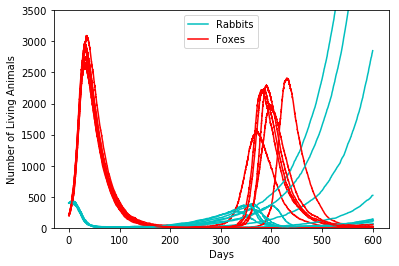

The foxes went extinct 5 times out of 10 or 50.0%.
The average second fox peak occurred at 392.7 days, with an average maximum of 2115 foxes.
The standard deviation of the days is 20.49, and the IQR is [381.7-395.9].
The standard deviation of the foxes is 311.70, and the IQR is [2037.5-2281.2].


In [71]:
%lprun -f run_everything run_everything()


## Analysis

The line profiler showed that
```
while max(t) < end_time:
```
was taking >80% of the time.
Replacing it with
```
while t[-1] < end_time:
```
made the simulation go from 55 seconds to 9 seconds!